In [3]:
"""
Oct 2021
Antoine Grouazel
je veux voir la forme des matrices du model que jai entrainer avec l algo de Quach sur les donnees SLC spectre + cwave
inspiration https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
"""

'\nOct 2021\nAntoine Grouazel\nje veux voir la forme des matrices du model que jai entrainer avec l algo de Quach sur les donnees SLC spectre + cwave\ninspiration https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/\n'

In [1]:
import logging
import os
import sys
import sys
#sys.path.append('/home1/datahome/agrouaze/git/SAR-Wave-Height/')
sys.path.append('/home1/datahome/agrouaze/git/sar_hs_nn/sarhspredictor/lib/')
from tensorflow.keras.models import load_model
import keras
import sarhs.generator as tyty
from importlib import reload
reload(tyty)
print(tyty.__file__)
from sarhs.generator import SARGenerator
print(dir(SARGenerator))
from sarhs.heteroskedastic import Gaussian_NLL,Gaussian_MSE
file_model = '/home1/scratch/agrouaze/test_exp1_complete_dataset_provided_to_zhengyang/keras_model_exp1.h5' #25 sept 21
# copied on datawork
file_model = '/home1/datawork/agrouaze/data/sentinel1/cwave/keras_model_exp1_v1_SLC_cwave_+Spectrum_SLC_25sept21.h5'
custom_objects = {'Gaussian_NLL':Gaussian_NLL,'Gaussian_MSE':Gaussian_MSE}
model = load_model(file_model,custom_objects=custom_objects)

Using TensorFlow backend.


/home1/datahome/agrouaze/git/sar_hs_nn/sarhspredictor/lib/sarhs/generator.py
['__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_calc_batches_per_group', '_get_batch_contiguous', '_keras_api_names', '_keras_api_names_v1', '_num_examples_group', 'on_epoch_end']


# look at structure of the model

In [3]:
print(type(model))
print(dir(model))

<class 'tensorflow.python.keras.engine.functional.Functional'>
['_TF_MODULE_IGNORED_PROPERTIES', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_activity_regularizer', '_add_trackable', '_add_variable_with_custom_getter', '_assert_compile_was_called', '_assert_weights_created', '_auto_track_sub_layers', '_autocast', '_autographed_call', '_base_model_initialized', '_build_input_shape', '_call_accepts_kwargs', '_call_arg_was_passed', '_call_fn_arg_defaults', '_call_fn_arg_positions', '_call_fn_args', '_call_full_argspec', '_callable_losses', '_cast_single_input', '_check_call_args', '_checkpoint_dependencies', '_clear_losses', '_compile_was_called', '_

38
0 (32, 256)


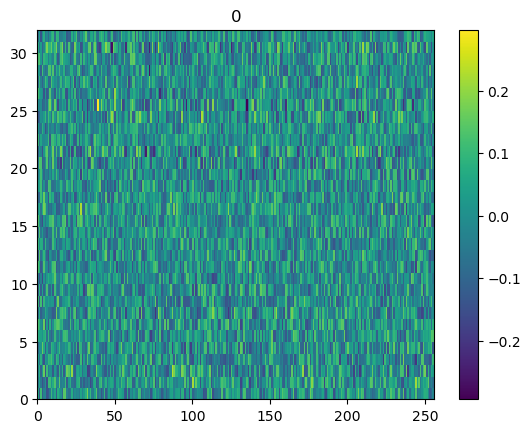

1 (256,)


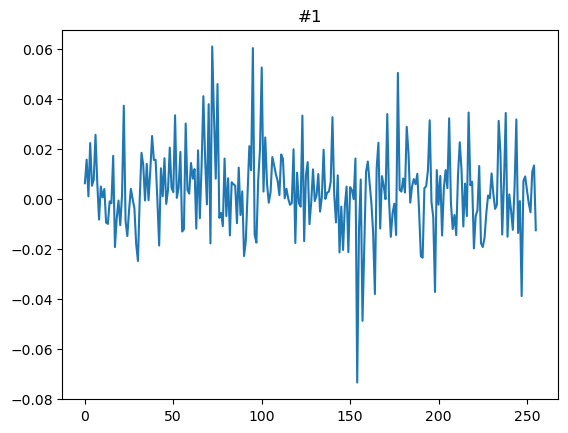

2 (256, 256)


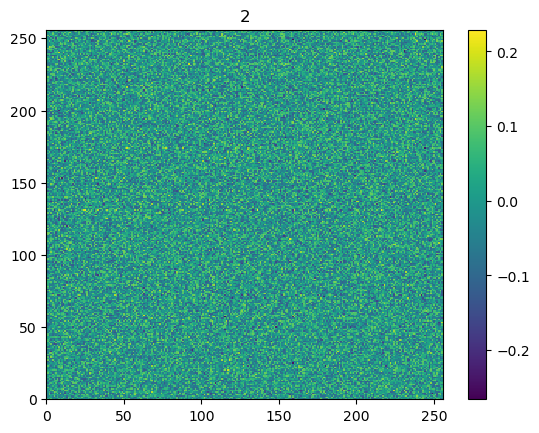

3 (256,)


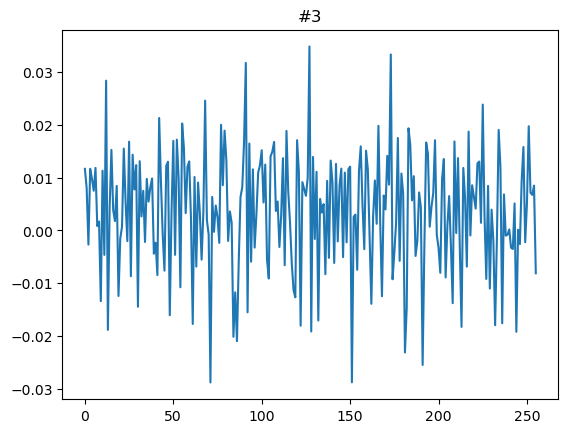

4 (3, 3, 2, 64)


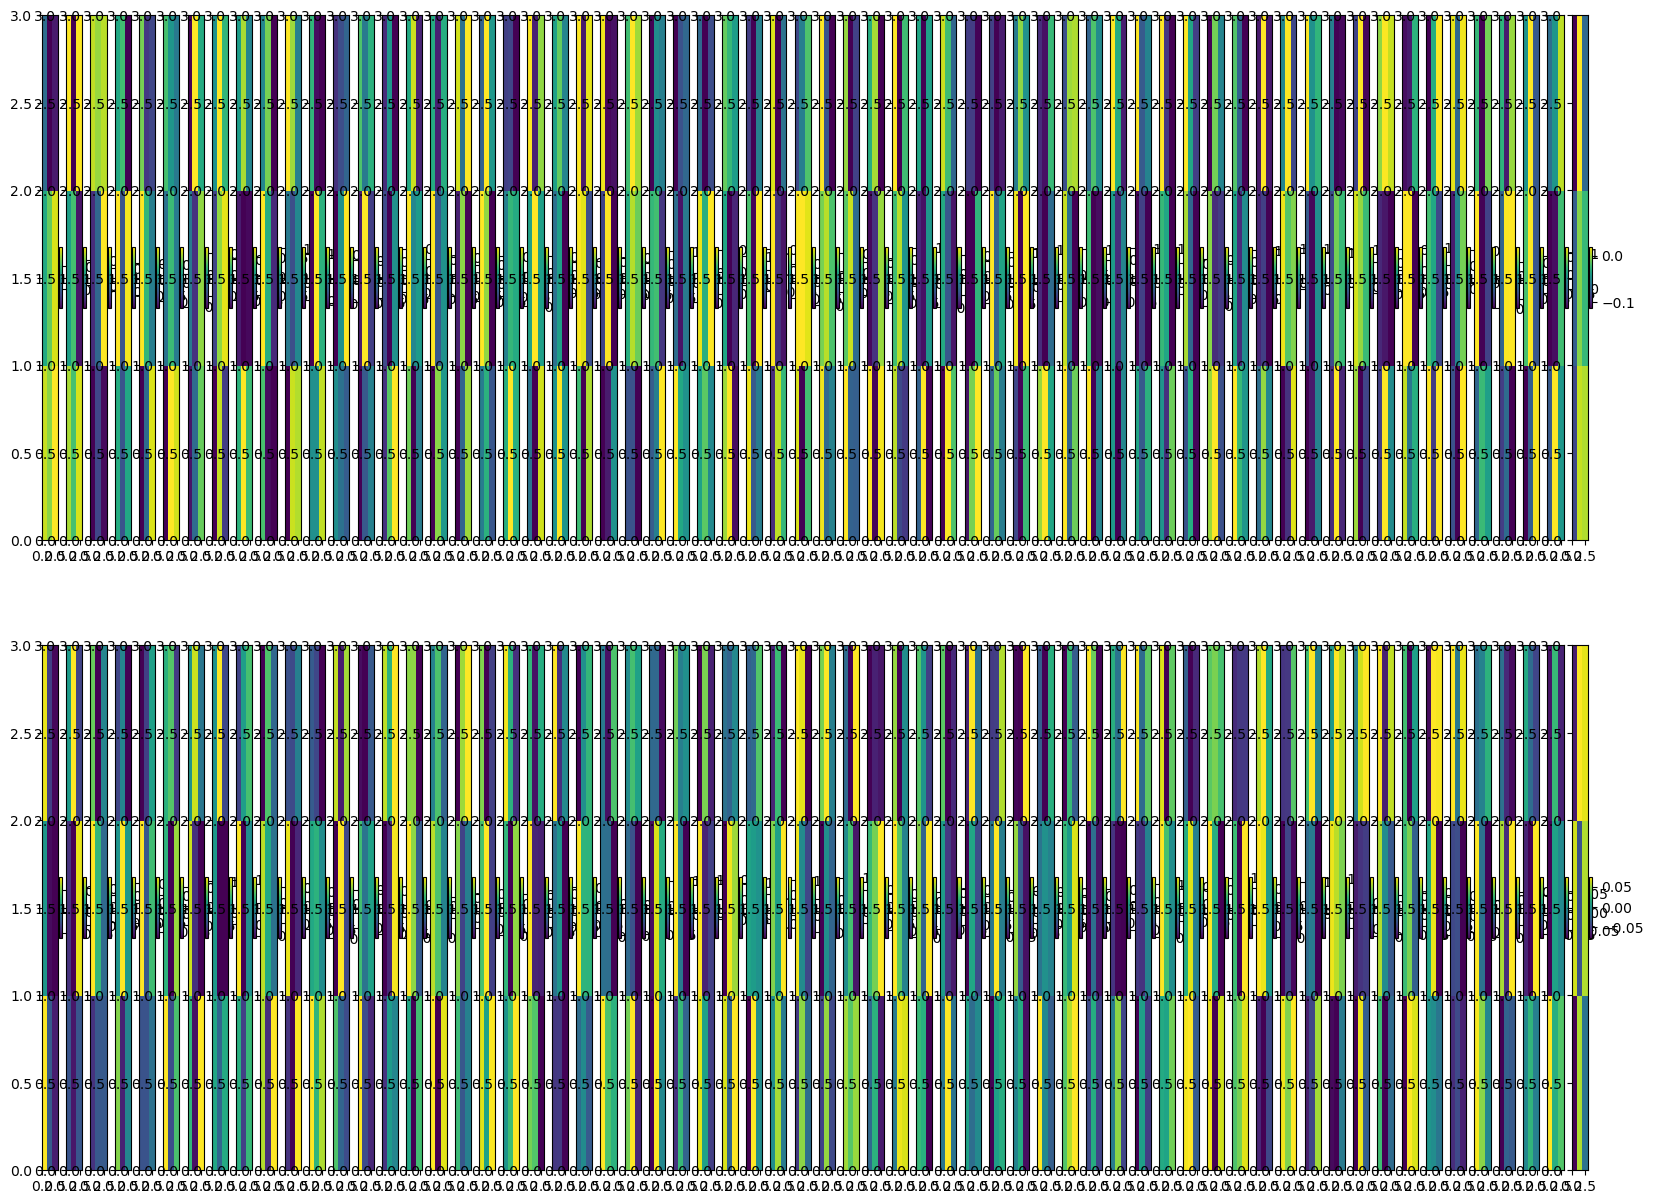

5 (64,)


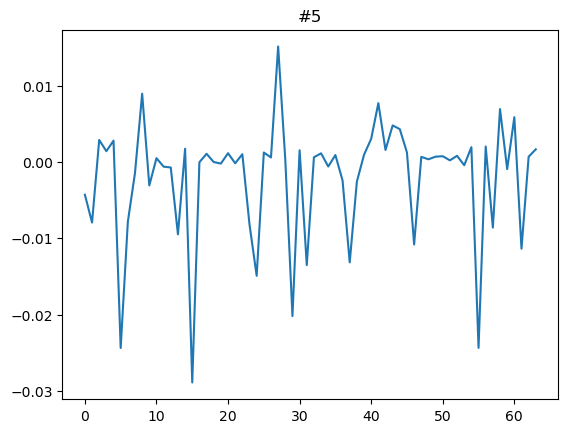

6 (256, 256)


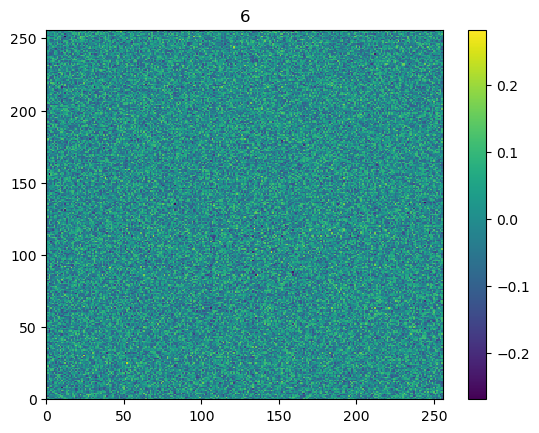

7 (256,)


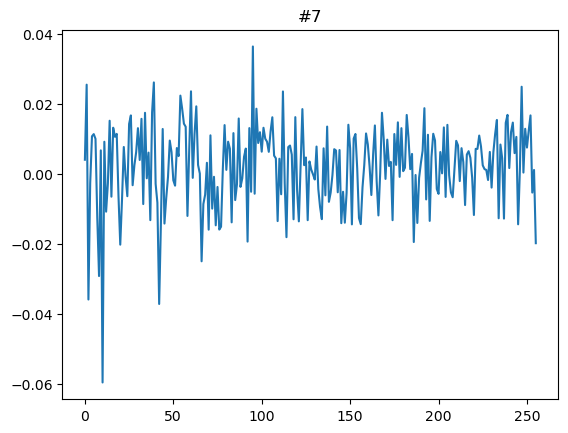

8 (256, 256)


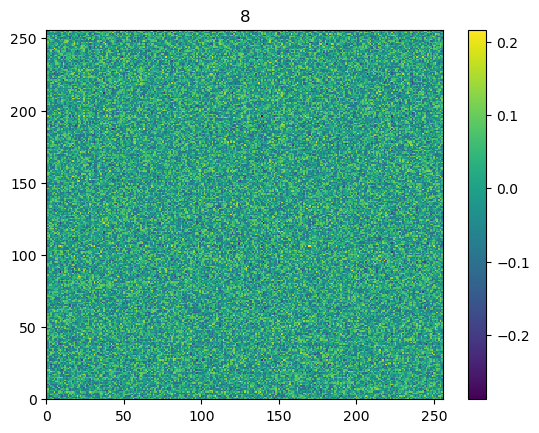

9 (256,)


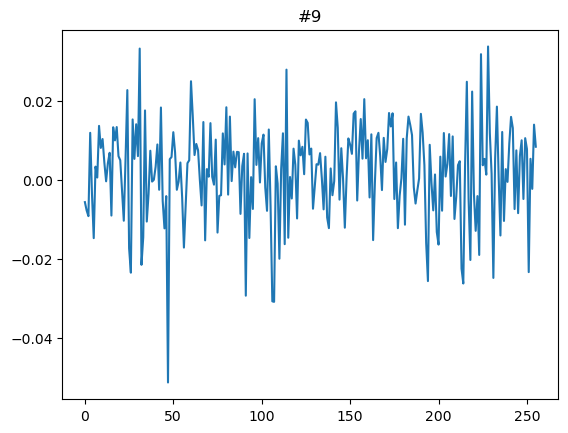

10 (3, 3, 64, 128)


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2aabf9aacaf0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x2aabf973fe50> (for post_execute):


KeyboardInterrupt: 

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
weights = model.get_weights()
print(len(weights))
for ii,wi in enumerate(weights):
    print(ii,wi.shape)
    if len(wi.shape)==2:
        plt.figure()
        plt.title(ii)
        plt.pcolor(wi)
        plt.colorbar()
        plt.show()
    elif len(wi.shape)>2:
        plt.figure(figsize=(20,15))
        nb_line = wi.shape[2]
        nb_col = wi.shape[3]
        cpt = 1
        for xx in range(nb_line):
            for yy in range(nb_col):
                #print('tmp',xx,'/',nb_line,yy,'/',nb_col,cpt)
                plt.subplot(nb_line,nb_col,cpt)
                plt.pcolor(wi[:,:,xx,yy].squeeze())
                plt.colorbar()
                cpt +=1
        plt.show()
                
    else:
        plt.figure()
        plt.title('#%s'%ii)
        plt.plot(wi)
        plt.show()